In [1]:
import ROOT as rt
from larcv import larcv
import numpy as np
import matplotlib.pyplot as plt
from array import array

Welcome to JupyROOT 6.14/02


In [2]:
# Specify location of dataset
# get the data at: http://www.stanford.edu/~kterao/public_data/v0.1.0/2d/classification/five_particles/practice_test_5k.root
dataset = "practice_test_5k.root"

In [3]:
# Get a look of the ROOT Trees inside the file
f = rt.TFile(dataset) # open file
f.ls() # print contents
f.Close() # close file (since we dont intend to interact with file directly

TFile**		practice_test_5k.root	
 TFile*		practice_test_5k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


In [4]:
# create instance of IOManager that will interface with file
io = larcv.IOManager(larcv.IOManager.kREAD,"input",larcv.IOManager.kTickForward)
io.add_in_file( dataset )
io.initialize()

True

    [NORMAL]  <input::prepare_input> Opening a file in READ mode: practice_test_5k.root
    [NORMAL]  <input::initialize> Prepared input with 5000 entries...


Warning in <TStreamerInfo::Build>: larcv::EventParticle: base class larcv::ParticleSet has no streamer or dictionary it will not be saved


In [5]:
# Define a new ROOT File. We'll write to this one.
# We also set up the TFile to overwrite any file with the same name.
# To prevent re-writing, use the "new" option.
outfile = rt.TFile("out.root","recreate")


# Define the tree
tree = rt.TTree("example","Example output tree")

# Define the branches and assign variable to save

# branch to save image crop
data = larcv.NumpyArrayFloat()
tree.Branch("data",data)

# branch to save pdg code
pdgcode = array('i',[0]) # single integer
tree.Branch("pdg",pdgcode,"pdg/I")

<ROOT.TBranch object ("pdg") at 0x5625d081ea60>

In [6]:
NENTRIES = io.get_n_entries()
entry_list = np.random.randint(0,NENTRIES-1,size=10)
print(entry_list)

[4881 2886 2433 3125  654  114  823 1263 3875 4631]


/home/twongjirad/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  
/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


('shape: ', (256, 256))
ENTRY[4881] PDG=2212
('shape: ', (256, 256))
ENTRY[2886] PDG=13
('shape: ', (256, 256))
ENTRY[2433] PDG=13
('shape: ', (256, 256))
ENTRY[3125] PDG=211
('shape: ', (256, 256))
ENTRY[654] PDG=11
('shape: ', (256, 256))
ENTRY[114] PDG=11
('shape: ', (256, 256))
ENTRY[823] PDG=11
('shape: ', (256, 256))
ENTRY[1263] PDG=22
('shape: ', (256, 256))
ENTRY[3875] PDG=211
('shape: ', (256, 256))
ENTRY[4631] PDG=2212


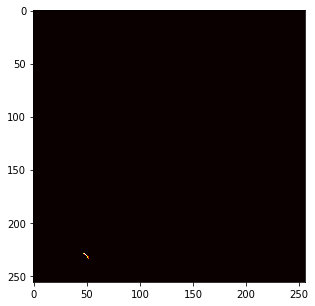

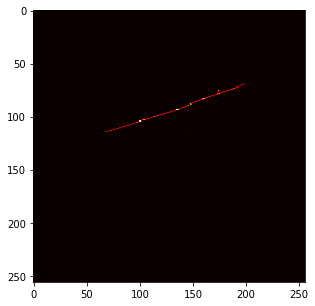

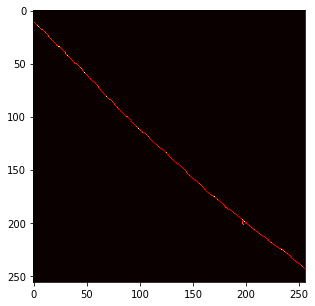

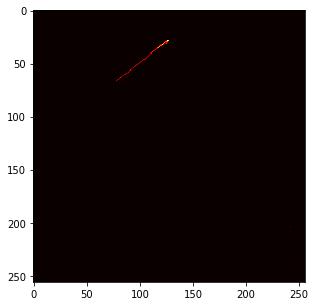

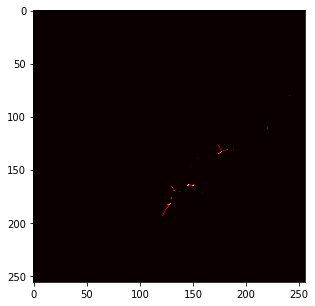

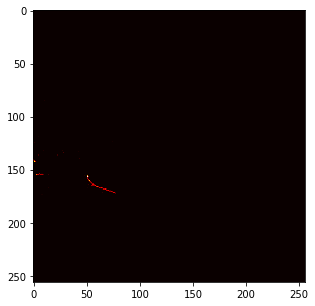

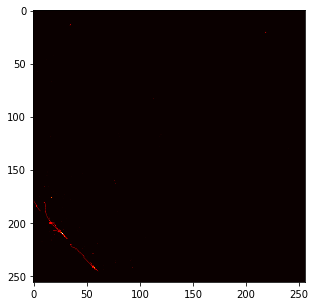

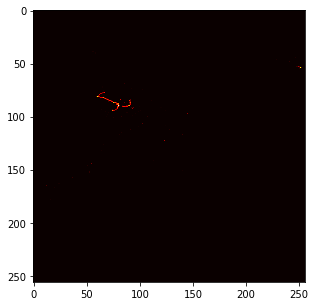

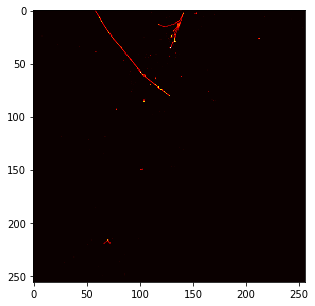

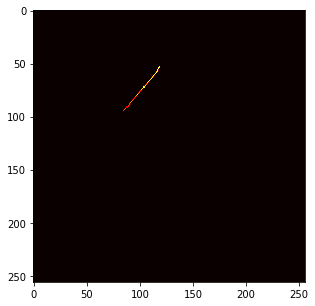

In [7]:
for n,entry in enumerate(entry_list.tolist()):
    
    io.read_entry(entry)
    ev_data = io.get_data(larcv.kProductImage2D,"data")
    ev_particle = io.get_data(larcv.kProductParticle, "mctruth")
    
    img = ev_data.at(2)
    np_img = larcv.as_ndarray(img)
    print("shape: ",np_img.shape)
    
    # we crop inside the image
    np_crop = np_img[75:125,75:125]
    
    # store crop in NumpyArrayFloat class
    data.store(np_crop)
    
    # store pdg code
    pdgcode[0] = ev_particle.as_vector().at(0).pdg_code()
    
    print("ENTRY[%d] PDG=%d"%(entry,pdgcode[0]))
    
    # save entry in tree
    tree.Fill()
    
    fig, ax = plt.subplots(1,1,figsize=(5, 5))
    #img = imgbatch[ib,:].reshape(256,256)
    #imgout = padandcropandflip(img)
    #print("LABEL[%d]: "%(ib),labelname[np.argmax(lbl[ib])])
    ax.imshow(np_img, cmap='hot', interpolation='nearest')
    fig.show()

In [8]:
# Write Tree and close
# Note: if you want to fill and save the tree again, need to rerun cell that creates TFile
tree.Write()
outfile.Close()

ENTRY[0] pdg=2212
ENTRY[1] pdg=13
ENTRY[2] pdg=13
ENTRY[3] pdg=211
ENTRY[4] pdg=11
ENTRY[5] pdg=11
ENTRY[6] pdg=11
ENTRY[7] pdg=22
ENTRY[8] pdg=211
ENTRY[9] pdg=2212
TFile**		out.root	
 TFile*		out.root	
  KEY: TTree	example;1	Example output tree


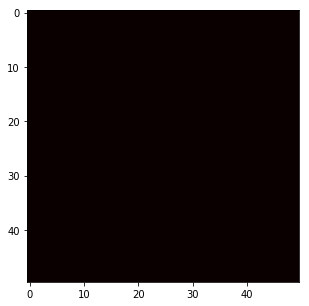

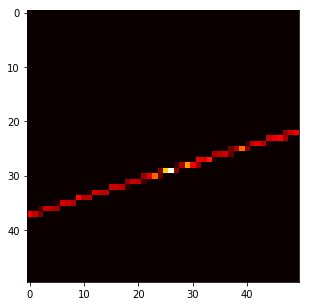

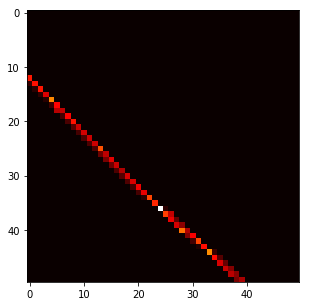

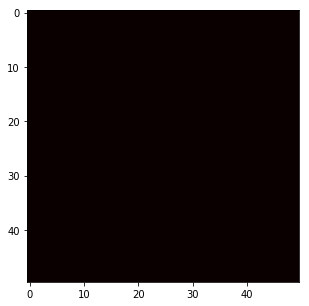

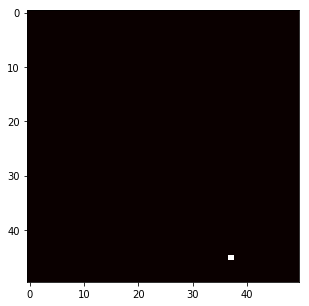

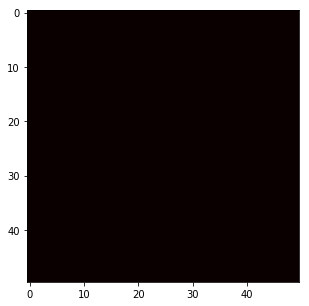

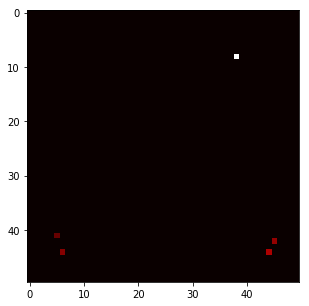

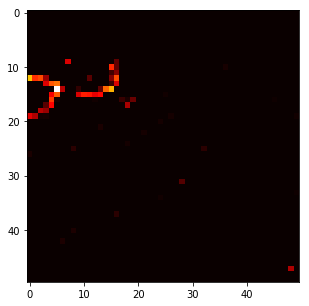

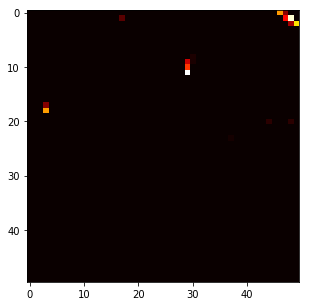

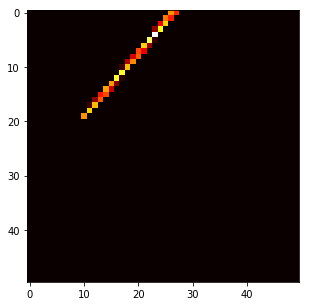

In [9]:
# OPEN THE FILE AND TREE AND DUMP IMAGES
infile = rt.TFile("out.root")
infile.ls()

intree = infile.Get("example")
nentries = intree.GetEntries()
for i in range(nentries):
    intree.GetEntry(i)
    print("ENTRY[%d] pdg=%d"%(i,intree.pdg))
    arr = intree.data.tonumpy()
    fig, ax = plt.subplots(1,1,figsize=(5, 5))
    ax.imshow(arr, cmap='hot', interpolation='nearest')
    fig.show()
    